In [1]:
import imageio
import matplotlib.pyplot as plt
import os

print("current working dir: {}".format(os.getcwd()))

current working dir: /home/prarit/MachineLearningProjects/computer-vision-segmentation


In [2]:
path = "/home/prarit/Carvana"

# files in the Carvana folder
os.listdir(path)

['test_hq.zip',
 'test.zip',
 'train_masks.zip',
 'train_masks',
 '29bb3ece3180_11.jpg',
 'metadata.csv.zip',
 'carvana-image-masking-challenge.zip',
 'train_masks.csv.zip',
 'train_hq.zip',
 'train',
 'sample_submission.csv.zip',
 'train.zip']

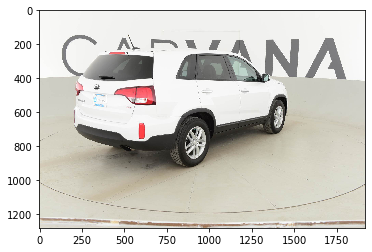

In [3]:
sample_im = imageio.imread(path+'/29bb3ece3180_11.jpg')
plt.imshow(sample_im)
plt.show()

In [4]:
import glob

In [5]:
train_files = glob.glob(path+"/train/*.jpg")
print("number of images in the training set: {}".format(len(train_files)))

number of images in the training set: 5088


In [6]:
train_mask_files = glob.glob(path+"/train_masks/*.gif")
print("number of images in the train_masks : {}".format(len(train_mask_files)))

number of images in the train_masks : 5088


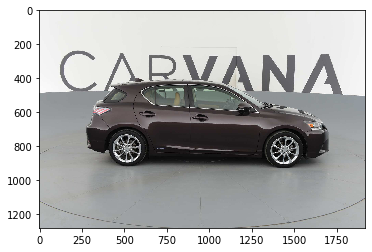

In [7]:
# choose a random training image and checkout it's mask
sample_im_path = train_files[10]
sample_im = imageio.imread(sample_im_path)
plt.imshow(sample_im)
plt.show()

In [8]:
sample_im_path

'/home/prarit/Carvana/train/6e016b8b3617_13.jpg'

In [9]:
import re

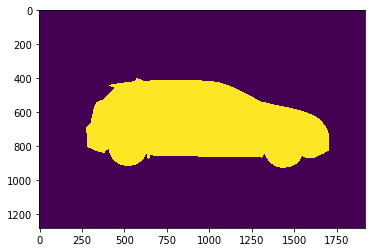

In [10]:
pattern = re.compile(r"(\w+).jpg$")
image_number = pattern.search(sample_im_path)[1] # the unique identifier of the image

# use the image_number to find it's corresponding mask
mask_file_path = path+"/train_masks/{}_mask.gif".format(image_number)
sample_mask = imageio.imread(mask_file_path)
plt.imshow(sample_mask)
plt.show()

In [11]:
import numpy as np

In [12]:
# unique entries in the mask array
np.unique(sample_mask)

Array([  0, 255], dtype=uint8)

In [13]:
sample_im.shape

(1280, 1918, 3)

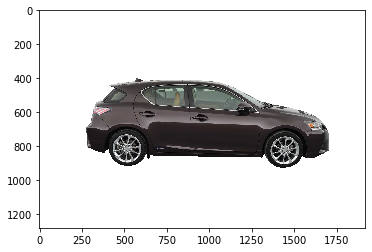

In [14]:
# expand the dim of sample mask to add a channel axis
sample_mask = np.expand_dims(sample_mask, 2)

# concatenate the sample image and it's mask to overlay the mask over the sample image
overlayed = np.concatenate((sample_im, sample_mask), axis = 2)
plt.imshow(overlayed)
plt.show()

In [15]:
# merge all the above steps into a function to analyse a bunch of different images
def show_sample(idx):
    sample_im_path = train_files[idx]
    pattern = re.compile(r"(\w+).jpg$")
    sample_im = imageio.imread(sample_im_path)
    image_number = pattern.search(sample_im_path)[1] # the unique identifier of the image
    mask_file_path = path+"/train_masks/{}_mask.gif".format(image_number)
    sample_mask = imageio.imread(mask_file_path)
    overlayed = np.concatenate((sample_im, np.expand_dims(sample_mask, 2)), axis = 2)
    
    fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (10,5))
    ax[0].imshow(sample_im)
    ax[0].set_title("original image")
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[1].imshow(sample_mask)
    ax[1].set_title("mask")
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[2].imshow(overlayed)
    ax[2].set_title("mask overlayed on the image")
    ax[2].set_xticks([])
    ax[2].set_yticks([])
        

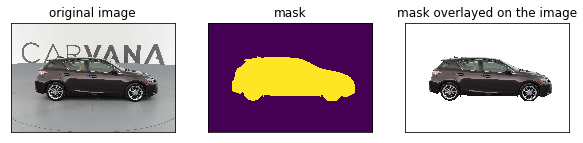

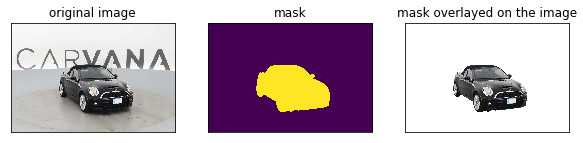

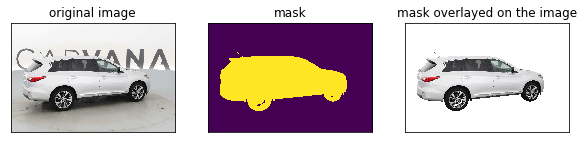

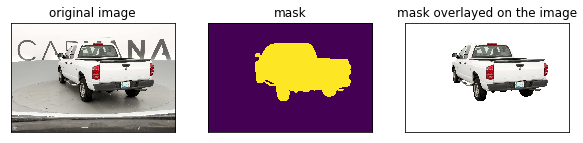

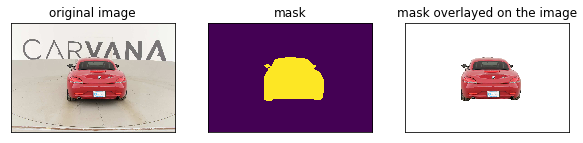

In [16]:
samples_list = [10, 1022, 2543, 3988, 5011]
for sample_num in samples_list:
    show_sample(sample_num)

In [17]:
# function to check that all the training images have shape (1280, 1918, 3)
def check_shape(path_list, shape):
    for file in path_list:
        print("\rchecking: {}".format(file),  end="")
        im = imageio.imread(file)
        if im.shape != shape:
            print("shape of {} does not match".format(file))
            return
    print("\nFinished: All the files have shape: {}".format(shape))    

In [18]:
check_shape(train_files, (1280, 1918, 3))

checking: /home/prarit/Carvana/train/3810c5e1cdeb_03.jpg
Finished: All the files have shape: (1280, 1918, 3)
